In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configuração do Problema ---
L = 1.0
rho = 1.0
gamma = 1.0     # Difusividade
phi0 = 10.0     # CC em x=0
phiL = 20.0     # CC em x=L
S_val = 50.0    # Termo Fonte

## 1. Solução exata da equação:

A equação governante para o problema unidimensional de convecção-difusão com termo fonte constante é dada por:

$$\frac{d}{dx} \left( \rho u \phi - \Gamma \frac{d\phi}{dx} \right) = S$$

Onde:$\rho, u, \Gamma$ e $S$ são constantes.

Condições de Contorno:

* Em $x = 0$, $\phi = \phi_0$.

* Em $x = L$, $\phi = \phi_L$.

Para resolver a EDO, primeiro integramos a equação em relação a $x$. Como $S$ é constante:

$$\rho u \phi - \Gamma \frac{d\phi}{dx} = Sx + C_1$$

Esta é uma EDO linear de primeira ordem não homogênea para $\phi(x)$. 

Podemos reescrevê-la na forma padrão:

$$\Gamma \frac{d\phi}{dx} - \rho u \phi = - (Sx + C_1)$$

Ou, dividindo por $\Gamma$:

$$\frac{d\phi}{dx} - \frac{\rho u}{\Gamma} \phi = - \frac{S}{\Gamma}x - \frac{C_1}{\Gamma}$$

A solução geral $\phi(x)$ é a soma da solução homogênea ($\phi_h$) e uma solução particular ($\phi_p$):

$$\phi(x) = \phi_h(x) + \phi_p(x)$$

#### Solução Homogênea ($\phi_h$)

Para a parte homogênea, consideramos o termo fonte e as constantes de integração como zero ($\frac{d\phi}{dx} - \frac{\rho u}{\Gamma}\phi = 0$):

$$\frac{d\phi}{\phi} = \frac{\rho u}{\Gamma} dx$$

Integrando ambos os lados:

$$\ln(\phi) = \frac{\rho u}{\Gamma} x + C' \quad \Rightarrow \quad \phi_h(x) = K e^{\frac{\rho u}{\Gamma}x}$$

Vamos definir o Número de Peclet local como $P = \frac{\rho u L}{\Gamma}$. Assim, o expoente pode ser escrito em função de $P$. No entanto, para a dedução, manteremos $\frac{\rho u}{\Gamma}$.

#### Solução Particular ($\phi_p$)

Como o termo não homogêneo é linear em $x$ (do termo $Sx$), propomos uma solução particular da forma linear:

$$\phi_p(x) = Ax + B$$

Substituindo na equação diferencial original $\frac{d}{dx}(\rho u \phi - \Gamma \frac{d\phi}{dx}) = S$:

$$\frac{d}{dx} \left( \rho u (Ax + B) - \Gamma \frac{d}{dx}(Ax + B) \right) = S$$

$$\frac{d}{dx} \left( \rho u Ax + \rho u B - \Gamma A \right) = S$$

Derivando em relação a $x$:$$\rho u A = S \quad \Rightarrow \quad A = \frac{S}{\rho u}$$

O valor de $B$ é absorvido pelas constantes de integração da solução geral, então podemos considerar a forma mais simples $\phi_p(x) = \frac{S}{\rho u}x$. 

#### Solução Geral Completa

Somando $\phi_h$ e $\phi_p$:

$$\phi(x) = K_1 + K_2 e^{\frac{\rho u}{\Gamma}x} + \frac{S}{\rho u}x$$

(Nota: $K_1$ e $K_2$ são as constantes a serem determinadas pelas condições de contorno).

#### Aplicação das Condições de Contorno

Agora aplicamos as condições fornecidas no problema para encontrar $K_1$ e $K_2$.

* Condição 1: $x = 0, \phi = \phi_0$

$$\phi_0 = K_1 + K_2 e^{0} + 0$$

$$\phi_0 = K_1 + K_2 \quad \Rightarrow \quad K_1 = \phi_0 - K_2$$

* Condição 2: $x = L, \phi = \phi_L$

$$\phi_L = K_1 + K_2 e^{\frac{\rho u L}{\Gamma}} + \frac{S L}{\rho u}$$

Substituindo $K_1 = \phi_0 - K_2$:

$$\phi_L = (\phi_0 - K_2) + K_2 e^{\frac{\rho u L}{\Gamma}} + \frac{S L}{\rho u}$$

Agrupando os termos com $K_2$:

$$\phi_L - \phi_0 - \frac{S L}{\rho u} = K_2 \left( e^{\frac{\rho u L}{\Gamma}} - 1 \right)$$

Isolando $K_2$:

$$K_2 = \frac{(\phi_L - \phi_0) - \frac{S L}{\rho u}}{e^{\frac{\rho u L}{\Gamma}} - 1}$$

E consequentemente para $K_1$:

$$K_1 = \phi_0 - \frac{(\phi_L - \phi_0) - \frac{S L}{\rho u}}{e^{\frac{\rho u L}{\Gamma}} - 1}$$

#### Solução Exata Final

Substituindo $K_1$ e $K_2$ de volta na equação geral:

$$\phi(x) = \left( \phi_0 - K_2 \right) + K_2 e^{\frac{\rho u}{\Gamma}x} + \frac{S}{\rho u}x$$

$$\phi(x) = \phi_0 + K_2 \left( e^{\frac{\rho u}{\Gamma}x} - 1 \right) + \frac{S}{\rho u}x$$

Substituindo a expressão encontrada para $K_2$, temos a solução exata final:

$$\phi(x) = \phi_0 + \left[ \frac{(\phi_L - \phi_0) - \frac{S L}{\rho u}}{e^{\frac{\rho u L}{\Gamma}} - 1} \right] \left( e^{\frac{\rho u}{\Gamma}x} - 1 \right) + \frac{S}{\rho u}x$$

#### Forma Adimensional

Frequentemente, em CFD (Patankar), essa solução é apresentada de forma normalizada usando o número de Peclet $P = \frac{\rho u L}{\Gamma}$:

$$\frac{\phi(x) - \phi_0}{\phi_L - \phi_0} = \frac{e^{P(x/L)} - 1}{e^P - 1} + \frac{S L}{\rho u (\phi_L - \phi_0)} \left( \frac{x}{L} - \frac{e^{P(x/L)} - 1}{e^P - 1} \right)$$

In [2]:
def solucao_exata(x, rho, u, gamma, S, L, phi0, phiL):
    """
    Calcula a solução exata da equação de convecção-difusão 1D com fonte constante.
    """
    Delta_phi = phiL - phi0

    K1 = phi0 - (Delta_phi - S * L / (rho * u)) / (np.exp((rho * u * L) / gamma) - 1)

    K2 = (Delta_phi - (S * L) / (rho * u)) / (np.exp((rho * u * L) / gamma) - 1)

    phi_x = K1 + K2 * np.exp((rho * u / gamma) * x) + (S / (rho * u)) * x

    P_total = (rho * u * L) / gamma

    return phi_x

## 2. Equação geral discretizada:

Conforme deduzido anteriormente, a solução exata da equação geral do caso de convecção-difusão 1D em regime permanente
com o termo-fonte não nulo é:

$$\phi(x) = \phi_P + \left[ \frac{(\phi_E - \phi_P) - \frac{S L}{F_e}}{e^{P_e} - 1} \right] (e^{\frac{P_e}{L}x} - 1) + \frac{S}{F_e}x$$

Onde:

* $F_e = \rho u$ (Fluxo de massa) 

* $P_e = \frac{\rho u L}{\Gamma}$ (Número de Péclet local) 

* $L = \delta x_e$ (Distância entre os nós)

#### Obtenção do Fluxo Total $J(x)$ 

O fluxo total $J$ é definido como a soma da convecção e difusão:

$$J(x) = \rho u \phi - \Gamma \frac{d\phi}{dx} = F_e \phi - \Gamma \frac{d\phi}{dx}$$

Primeiro, calculamos a derivada $\frac{d\phi}{dx}$ da solução exata acima:

$$\frac{d\phi}{dx} = \left[ \frac{(\phi_E - \phi_P) - \frac{S L}{F_e}}{e^{P_e} - 1} \right] \left( \frac{P_e}{L} e^{\frac{P_e}{L}x} \right) + \frac{S}{F_e}$$

Lembrando que $\frac{P_e}{L} = \frac{\rho u}{\Gamma} = \frac{F_e}{\Gamma}$. 

Agora substituímos $\phi(x)$ e $\frac{d\phi}{dx}$ na equação de $J(x)$.

Ao fazer essa substituição, os termos exponenciais se cancelam.

O termo convectivo ($F_e \phi$) contribui com um termo positivo proporcional a $e^{Px}$.

O termo difusivo ($-\Gamma \frac{d\phi}{dx}$) contribui com um termo negativo proporcional a $e^{Px}$.

O que sobra são apenas os termos constantes e lineares. Após manipulação algébrica, obtemos a expressão do fluxo total $J(x)$:

$$J(x) = \underbrace{F_e \left( \phi_P + \frac{\phi_P - \phi_E}{e^{P_e} - 1} \right)}_{\text{Parte Homogênea}} + \underbrace{S \left( x + \frac{L}{e^{P_e} - 1} - \frac{L}{P_e} \right)}_{\text{Termos devido à Fonte } S}$$

Note que a primeira parte é idêntica à expressão apresentada nas notas de aula para convecção-difusão 1D em regime permanente com o termo-fonte nulo. 

A segunda parte representa a variação do fluxo causada pela geração

#### Desenvolvimento até a Equação Discretizada 

A equação de conservação para o volume de controle exige que o balanço de fluxos seja igual à geração interna:

$$J_e - J_w = \int_{w}^{e} S \, dx$$

Assumindo $S$ constante no volume de controle, a integral resulta em $S \Delta x$.

Para obter a equação discretizada, utilizamos a Parte Homogênea dos fluxos $J_e$ e $J_w$ (que contêm as variáveis nodais $\phi$) para definir os coeficientes, e tratamos o termo fonte como uma adição linear.

Fluxo na face leste ($J_e$):

$$J_e = F_e \left( \phi_P + \frac{\phi_P - \phi_E}{e^{P_e} - 1} \right)$$

Fluxo na face oeste ($J_w$):

$$J_w = F_w \left( \phi_W + \frac{\phi_W - \phi_P}{e^{P_w} - 1} \right)$$

Substituindo no balanço $J_e - J_w = S \Delta x$:

$$F_e \left( \phi_P + \frac{\phi_P - \phi_E}{e^{P_e} - 1} \right) - F_w \left( \phi_W + \frac{\phi_W - \phi_P}{e^{P_w} - 1} \right) = S \Delta x$$

Agrupando os termos de $\phi_P$, $\phi_E$ e $\phi_W$ para chegar à forma $a_P \phi_P = a_E \phi_E + a_W \phi_W + b$ 

* Termo que multiplica $\phi_E$ ($a_E$):

$$a_E = \frac{F_e}{e^{P_e} - 1}$$

* Termo que multiplica $\phi_W$ ($a_W$):

$$a_W = \frac{F_w e^{P_w}}{e^{P_w} - 1}$$

* Termo que multiplica $\phi_P$ ($a_P$):

$$a_P = \left(F_e + \frac{F_e}{e^{P_e} - 1} + \frac{F_w}{e^{P_w} - 1} \right)$$

ou:

$$a_P = F_e + a_E + (a_W - F_w) = a_E + a_W + (F_e - F_w)$$

* Termo Fonte $b$

$$b =  S \Delta x$$

A equação discretizada final, considerando o termo fonte, é:

$$a_P \phi_P = a_E \phi_E + a_W \phi_W + b$$

A dedução mostra que o uso da solução analítica completa (com $S \neq 0$) não altera a definição dos coeficientes $a_E$ e $a_W$ do Esquema Exponencial. A influência do termo fonte é tratada linearmente como $S \Delta x$ (ou $b$) na equação algébrica final.

## 3. Código

In [3]:
def esquema_exponencial(N, rho, u, gamma, S, L, phi0, phiL):
    """
    Resolve numericamente usando Volumes Finitos e o Esquema Exponencial.
    """
    dx = L / (N - 1)
    dxb = dx/2  # dx/2 para as bordas
    x = np.linspace(0, L, N)
    
    # Coeficientes físicos
    F = rho * u
    D = gamma / dx
    Db = gamma / dxb
    P_cell = F / D  # Peclet da malha (celula)
    P_cellb = F / Db  # Peclet da borda

    a, b, c, d = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    
    # Coeficientes a_E e a_W baseados no Esquema Exponencial
    for i in range(N):
        a_E = F/(np.exp(P_cell)-1)
        a_W = (F*np.exp(P_cell))/(np.exp(P_cell)-1)
        a_P = a_E + a_W 
        b_fonte = S * dx


        if i == 0:  # Fronteira Esquerda (Dirichlet phi0)
            a_W = 0
            a_P = 1# F + F/(np.exp(P_cell)-1) + F/(np.exp(P_cellb)-1)
            a_E = 0# F/(np.exp(P_cell)-1)
            b_fonte = phi0 # S*dx + ((F*np.exp(P_cellb))/(np.exp(P_cellb)-1)) * phi0

        elif i == N - 1:  # Fronteira Direita (Dirichlet phiL)
            a_W = 0# (F*np.exp(P_cell))/(np.exp(P_cell)-1)
            a_P = 1 #F + F/(np.exp(P_cellb)-1) + F/(np.exp(P_cell) - 1)
            a_E = 0
            b_fonte = phiL #S*dx + (F/(np.exp(P_cellb)-1)) * phiL

        a[i] = -a_W
        b[i] = a_P
        c[i] = -a_E
        d[i] = b_fonte
    
    return a, b, c, d


Algoritmo para a solução do sistema de equações (TDMA):

In [4]:
def solver_tdma(a, b, c, d):
    """Algoritmo de Thomas para sistemas tridiagonais"""
    n = len(d)
    P_star = np.zeros(n)
    Q_star = np.zeros(n)
    P_star[0] = c[0] / b[0]
    Q_star[0] = d[0] / b[0]
    for i in range(1, n):
        m = b[i] - a[i] * P_star[i-1]
        P_star[i] = c[i] / m
        Q_star[i] = (d[i] - a[i] * Q_star[i-1]) / m
    x = np.zeros(n)
    x[-1] = Q_star[-1]
    for i in range(n-2, -1, -1):
        x[i] = Q_star[i] - P_star[i] * x[i+1]
    return x


## 3. Simulação de casos variando a velocidade (u)

Foram rodados 5 casos com diferentes valores de u para avaliar a validade do esquema exponencial para diferentes valores de $\frac{\rho u L}{\Gamma}$

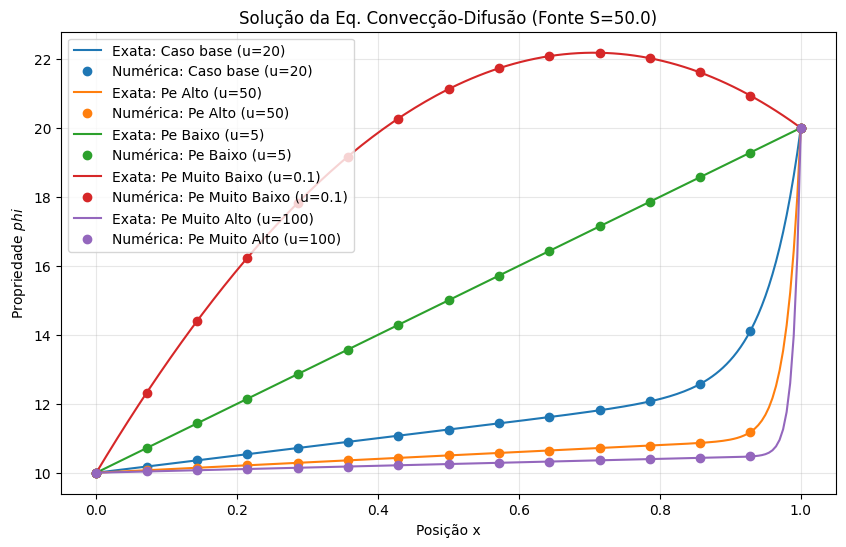

In [5]:
# Casos para simulação variando a velocidade u (Número de Peclet)
casos = [
    {'u': 20.0, 'S': 50, 'label': 'Caso base (u=20)'},
    {'u': 50.0, 'S': 50, 'label': 'Pe Alto (u=50)'},
    {'u': 5.0, 'S': 50, 'label': 'Pe Baixo (u=5)'},
    {'u': 0.1, 'S': 50.0, 'label': 'Pe Muito Baixo (u=0.1)'},
    {'u': 100.0, 'S': 50.0, 'label': 'Pe Muito Alto (u=100)'},
]

plt.figure(figsize=(10, 6))

for caso in casos:
    u_val = caso['u']
    S_val = caso['S']
    
    # Solução Exata (linha contínua)
    x_exata = np.linspace(0, L, 200)
    y_exata = solucao_exata(x_exata, rho, u_val, gamma, S_val, L, phi0, phiL)
    
    # Solução Numérica (pontos)
    a, b, c, d = esquema_exponencial(15, rho, u_val, gamma, S_val, L, phi0, phiL)

    y_num = solver_tdma(a, b, c, d)
    x_num = np.linspace(0, L, 15)
    
    # Plotagem
    p = plt.plot(x_exata, y_exata, label=f"Exata: {caso['label']}")
    plt.plot(x_num, y_num, 'o', color=p[0].get_color(), label=f"Numérica: {caso['label']}")

plt.title(f"Solução da Eq. Convecção-Difusão (Fonte S={S_val})")
plt.xlabel("Posição x")
plt.ylabel("Propriedade $phi$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('resultado_conveccao_difusao.png')
plt.show()

A velocidade altera diretamente o Número de Péclet ($Pe = \frac{\rho u L}{\Gamma}$), que mede a razão entre convecção e difusão.

* Baixa Velocidade ($u=0.1$ - Linha Vermelha): O escoamento é dominado pela difusão e pelo termo fonte. Como o fluido escoa lentamente, o tempo de residÊncia do fluido no domínio é alto, assim o termo fonte $S$ pode aumentar significativamente a propriedade $\phi$, elevando o valor máximo da curva acima das condições de contorno

* Alta Velocidade ($u=100$ - Linha Roxa): O escoamento é dominado pela convecção. O fluido transporta a propriedade $\phi_0$ (valor 10) da entrada para dentro do domínio com muita velocidade. A influência da geração interna $S$ é reduzida pelo escoamento rápido.

## 4. Simulação de casos variando o termo fonte (S)

Foram rodados 5 casos com diferentes valores de S para avaliar a validade do esquema exponencial para diferentes valores de $({S L^2}/{\Gamma})/ {(\phi_E - \phi_P)}$


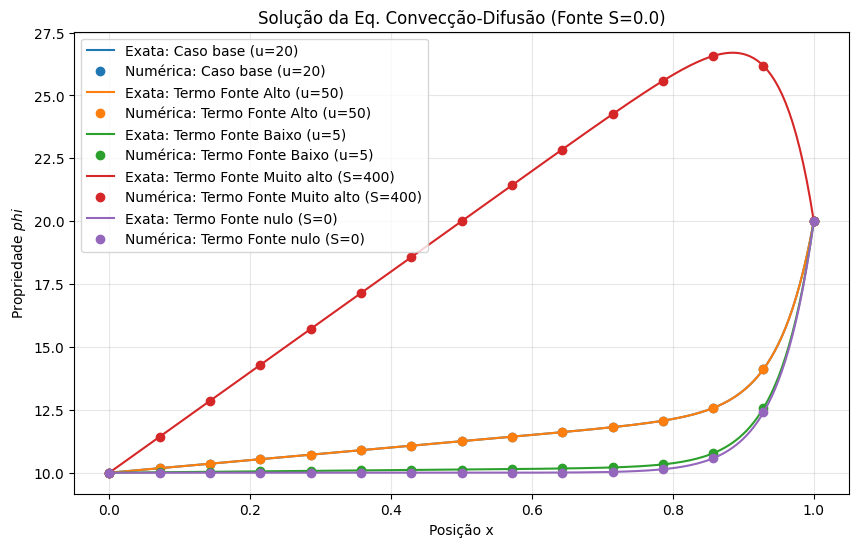

In [6]:
# Casos para simulação variando a velocidade u (Número de Peclet)
casos = [
    {'u': 20.0, 'S': 50, 'label': 'Caso base (u=20)'},
    {'u': 20.0, 'S': 50, 'label': 'Termo Fonte Alto (u=50)'},
    {'u': 20.0, 'S': 5, 'label': 'Termo Fonte Baixo (u=5)'},
    {'u': 20.0, 'S': 400.0, 'label': 'Termo Fonte Muito alto (S=400)'},
    {'u': 20.0, 'S': 0.0, 'label': 'Termo Fonte nulo (S=0)'},
]

plt.figure(figsize=(10, 6))

for caso in casos:
    u_val = caso['u']
    S_val = caso['S']
    
    # Solução Exata (linha contínua)
    x_exata = np.linspace(0, L, 200)
    y_exata = solucao_exata(x_exata, rho, u_val, gamma, S_val, L, phi0, phiL)
    
    # Solução Numérica (pontos)
    a, b, c, d = esquema_exponencial(15, rho, u_val, gamma, S_val, L, phi0, phiL)

    y_num = solver_tdma(a, b, c, d)
    x_num = np.linspace(0, L, 15)
    
    # Plotagem
    p = plt.plot(x_exata, y_exata, label=f"Exata: {caso['label']}")
    plt.plot(x_num, y_num, 'o', color=p[0].get_color(), label=f"Numérica: {caso['label']}")

plt.title(f"Solução da Eq. Convecção-Difusão (Fonte S={S_val})")
plt.xlabel("Posição x")
plt.ylabel("Propriedade $phi$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('resultado_conveccao_difusao.png')
plt.show()

Aqui, a velocidade é fixa e $S$ varia. O termo fonte representa a geração interna da propriedade $\phi$ ao longo do domínio

* Termo Fonte Nulo ($S=0$ - Linha Roxa): O perfil é o clássico decaimento exponencial da convecção-difusão. O valor de $\phi$ nunca excede os limites das condições de contorno (está sempre entre 10 e 20).

* Aumento do Termo Fonte ($S=5, 50, 100$): À medida que $S$ aumenta, a curva é "empurrada" para cima.

* Termo fonte Muito Alto ($S=400$ - Linha Vermelha): O termo fonte é alto o suficiente para elevar a propriedade $\phi$ para valores acima da condição de contorno.

## Conclusão

Os resultados numéricos coincidem exatamente com a solução analítica.

Ao observar ambos os gráficos, percebe-se que os pontos que representam a solução numérica coincidem perfeitamente com as linhas contínuas (solução exata), independentemente de $u$ ser alto ou baixo, ou de $S$ ser grande ou nulo.

Isso ocorre devido à própria formulação do Esquema Exponencial que, diferentemente de esquemas como Diferenças Centrais ou Upwind, que assumem perfis polinomiais (lineares ou constantes) entre os nós, o Esquema Exponencial utiliza a solução exata da equação homogênea para calcular os coeficientes $a_E$ e $a_W$.